<a href="https://colab.research.google.com/github/fxs2596/NerdOut/blob/main/PassOrFail(LogisticRegression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model accuracy (Logistic Regression, with lunch): 86.00%


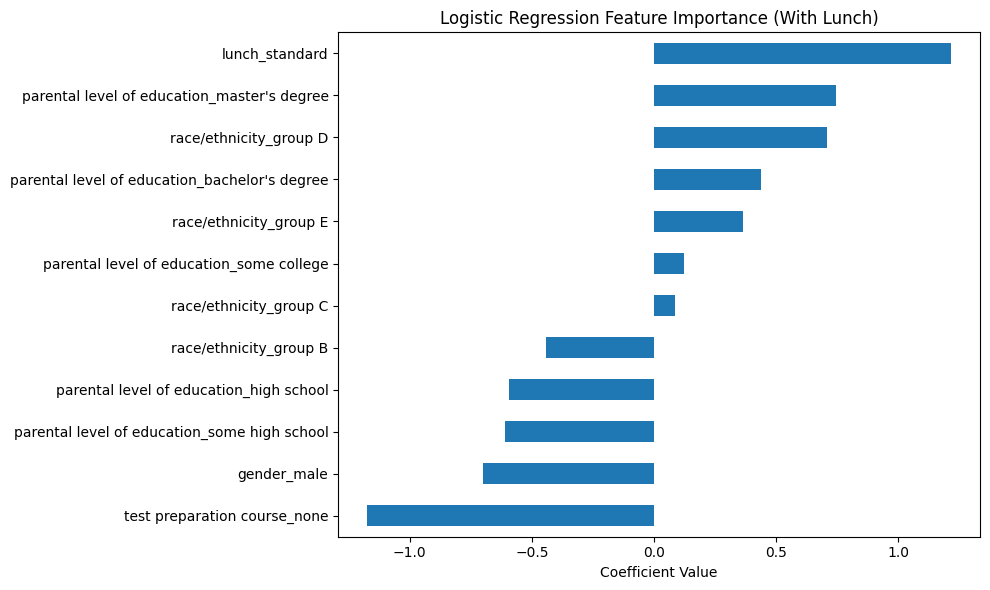

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. Load the dataset
df = pd.read_csv('/content/StudentsPerformance.csv')

# 2. Add average score and pass/fail label
df['average'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
df['pass'] = (df['average'] >= 50).astype(int)

# 3. One-hot encode categorical variables (with drop_first to avoid redundancy)
df_encoded = pd.get_dummies(df, columns=[
    'gender',
    'race/ethnicity',
    'parental level of education',
    'lunch',
    'test preparation course'
], drop_first=True)

# 4. Convert boolean to integer if needed
df_encoded = df_encoded.astype(int)

# 5. Define input features X and target y (INCLUDING lunch)
X = df_encoded.drop(columns=[
    'math score',
    'reading score',
    'writing score',
    'average',
    'pass'
])
y = df_encoded['pass']

# 6. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 8. Make predictions and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy (Logistic Regression, with lunch): {accuracy * 100:.2f}%")

# 9. Visualize feature importance (via coefficients)
importance = pd.Series(model.coef_[0], index=X.columns)

plt.figure(figsize=(10, 6))
importance.sort_values().plot(kind='barh')
plt.title("Logistic Regression Feature Importance (With Lunch)")
plt.xlabel("Coefficient Value")
plt.tight_layout()
plt.show()
